# Vos Ringing Study

In [2]:
import shutil

import numpy as np
import pandas as pd
import importlib

from matplotlib import pyplot as plt

import paramaterial as pam
from paramaterial.plug import DataSet

## Data Preparation

In [3]:
info = pam.preparing.make_info_table('data/00 backup data')
info

,test id,old filename,test type,material,temperature,rate
0,NaN,UA01.csv,NaN,NaN,NaN,NaN
1,NaN,UA02.csv,NaN,NaN,NaN,NaN
2,NaN,UA03.csv,NaN,NaN,NaN,NaN
3,NaN,UA04.csv,NaN,NaN,NaN,NaN
4,NaN,UA05.csv,NaN,NaN,NaN,NaN
5,NaN,UA06.csv,NaN,NaN,NaN,NaN
6,NaN,UA07.csv,NaN,NaN,NaN,NaN
7,NaN,UA08.csv,NaN,NaN,NaN,NaN
8,NaN,UA09.csv,NaN,NaN,NaN,NaN
9,NaN,UA10.csv,NaN,NaN,NaN,NaN


In [4]:
info['test id'] = [name[:-4] for name in info['old filename']]
info['test type'] = ['UA']*len(info)
info['material'] = ['AA1015']*len(info)
info['temperature'] = [25]*len(info)
info.to_excel('info/00 backup info incomplete.xlsx')
info

,test id,old filename,test type,material,temperature,rate
0,UA01,UA01.csv,UA,AA1015,25,NaN
1,UA02,UA02.csv,UA,AA1015,25,NaN
2,UA03,UA03.csv,UA,AA1015,25,NaN
3,UA04,UA04.csv,UA,AA1015,25,NaN
4,UA05,UA05.csv,UA,AA1015,25,NaN
5,UA06,UA06.csv,UA,AA1015,25,NaN
6,UA07,UA07.csv,UA,AA1015,25,NaN
7,UA08,UA08.csv,UA,AA1015,25,NaN
8,UA09,UA09.csv,UA,AA1015,25,NaN
9,UA10,UA10.csv,UA,AA1015,25,NaN


Manually add in remaining metadata.

In [5]:
pd.read_excel('info/00 backup info.xlsx')

,test id,old filename,test type,material,temperature,rate,L_f,D_0,L_0
0,UA01,UA01.csv,UA,AA1015,25,1,4.206,7.037333,10.588
1,UA02,UA02.csv,UA,AA1015,25,1,4.234,7.030333,10.592
2,UA03,UA03.csv,UA,AA1015,25,1,4.253,7.048667,10.600
3,UA04,UA04.csv,UA,AA1015,25,10,3.889,7.014000,10.609
4,UA05,UA05.csv,UA,AA1015,25,10,3.864,7.026333,10.584
5,UA06,UA06.csv,UA,AA1015,25,10,3.894,7.024000,10.612
6,UA07,UA07.csv,UA,AA1015,25,30,3.878,7.026333,10.614
7,UA08,UA08.csv,UA,AA1015,25,30,3.853,7.026000,10.586
8,UA09,UA09.csv,UA,AA1015,25,30,3.855,7.017000,10.588
9,UA10,UA10.csv,UA,AA1015,25,20,3.867,7.062000,10.602


In [6]:
pam.preparing.check_column_headers('data/00 backup data')

Checking column headers...
First file headers:
	['Time (sec)', 'AirRamPres (kN)', 'Force (kN)', 'Jaw (mm)', 'PowAngle (deg)', 'PTemp', 'Strain', 'Stress (MPa)', 'Stroke (mm)', 'wedge (mm)', 'Pram', 'ramError', 'Pwedge']
Headers in all files are the same as in the first file.


Copy files from backup then leave backup.

In [7]:
pam.preparing.copy_folder_and_files('data/00 backup data', 'data/01 prepared data')
shutil.copy('info/00 backup info.xlsx', 'info/01 prepared info.xlsx')

Copied 32 files from data/00 backup data to data/01 prepared data.


'info/01 prepared info.xlsx'

# Data Processing

Now that we have prepared the data, we can use the DataSet class for processing.

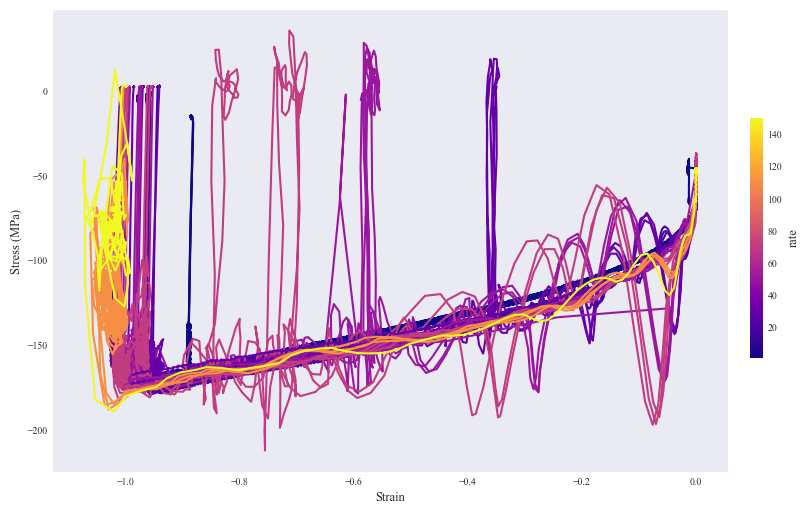

In [9]:
dataset = pam.plug.DataSet('data/01 prepared data', 'info/01 prepared info.xlsx')
fig, ax = plt.subplots(1,1,figsize=(9,6))
dataset.plot(ax, x='Strain', y='Stress (MPa)', ylabel='Stress (MPa)', legend=False, colourby='rate')

Multiply the srtess and strain columns in all the datafiles by -1.

100%|██████████| 32/32 [00:04<00:00,  6.45it/s]


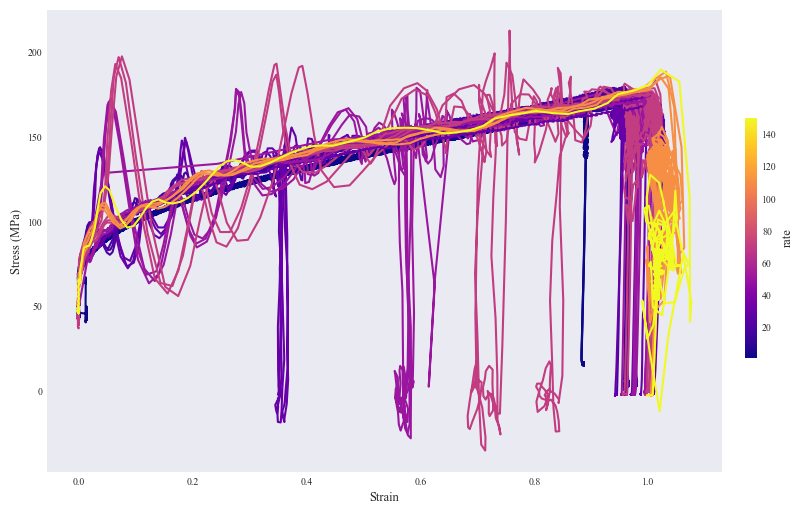

In [12]:
def neg_stress(dataitem):
    dataitem.data['Stress (MPa)'] = -dataitem.data['Stress (MPa)']
    dataitem.data['Strain'] = -dataitem.data['Strain']
    return dataitem
dataset.add_proc_op(neg_stress)
dataset.output('data/02 processed data',
               'info/02 processed info.xlsx')
dataset = DataSet('data/02 processed data',
                  'info/02 processed info.xlsx')
fig, ax = plt.subplots(1,1,figsize=(9,6))
dataset.plot(ax, x='Strain', y='Stress (MPa)', ylabel='Stress (MPa)', legend=False, colourby='rate')
plt.show()

(0.04, 0.2)

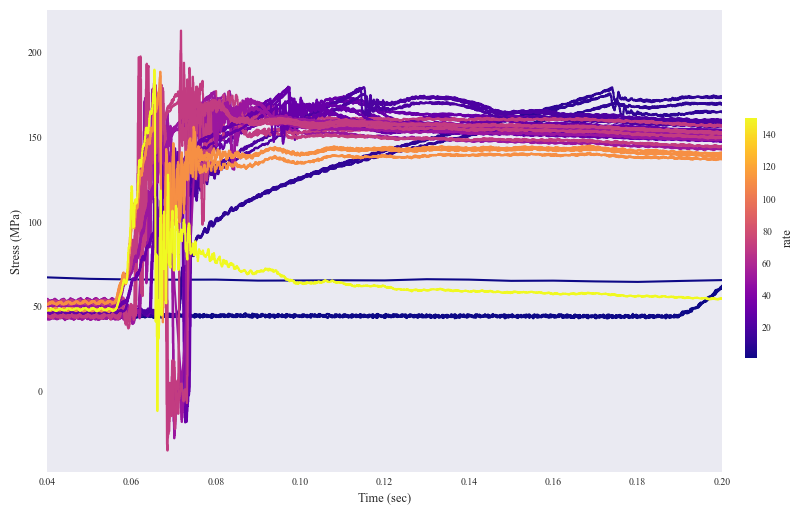

In [22]:
dataset = DataSet('data/02 processed data',
                  'info/02 processed info.xlsx')
fig, ax = plt.subplots(1,1,figsize=(9,6))
dataset.plot(ax, x='Time (sec)', y='Stress (MPa)', ylabel='Stress (MPa)', legend=False, colourby='rate')
ax.set_xlim(xmin=0.04, xmax=0.2)

(0.04, 0.2)

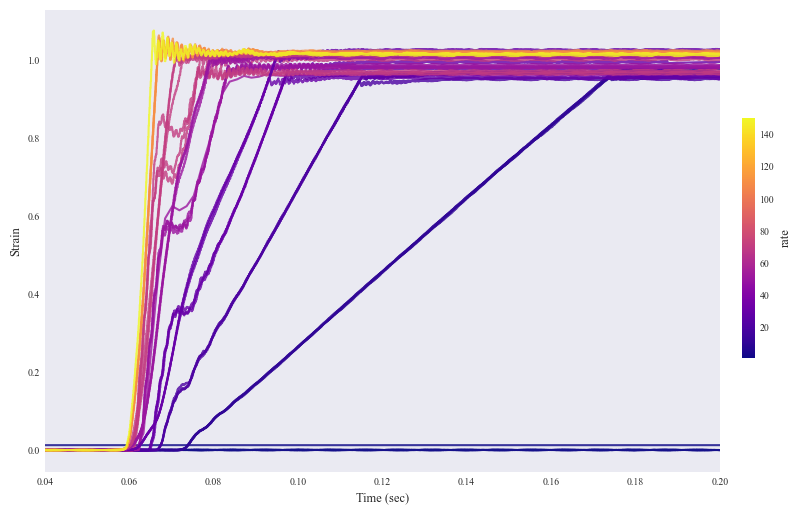

In [25]:
dataset = DataSet('data/02 processed data',
                  'info/02 processed info.xlsx')
fig, ax = plt.subplots(1,1,figsize=(9,6))
dataset.plot(ax, x='Time (sec)', y='Strain', ylabel='Strain', legend=False, colourby='rate', alpha=0.8)
ax.set_xlim(xmin=0.04, xmax=0.2)